**Regression with Simulated Data**<br/>

Prof. Dr. Jan Kirenz <br/>
HdM Stuttgart

In [127]:
%matplotlib inline

# Python set up (load modules) 
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf

import plotly.express as px
import seaborn as sns

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette='winter')

# Application 2: Linear regression with simulated data

In this application you will create some simulated data and fit simple linear regression models to it. 

IMPORTANT: Make sure to use **set.seed(123)** prior to starting part (a) to ensure consistent results.


Task (a) 

- Create a vector `X`, containing 100 observations drawn from a normal distribution with mean 0 and standard deviation 1. This represents our feature, X. 
- Furthermore, create a dependent variable `Y_perfect` as follows: `Y_perfect = −1 + 0.5 X`. This is also called a **population model** with known parameters since we "know" the true relationship between X and Y (which usually is not the case).  


Task (b) 

- Create an error vector, `err` (error), containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and standard deviation 0.25.

Task (c)

- Using `X` and `err`, generate a new vector `Y` according to the relationship: `Y = −1 + 0.5 X + err` (we call this model 1). 
- Questions: what is the length of the vector Y? What are the values of $β_0$ and $β_1$ in this linear relationship between Y and X?

Task (d)

- Use Pandas to create a DataFrame from `X`, `Y_perfect`, `err` and `Y` (call it `df`) 
- Make a **scatterplot** displaying the relationship between X and Y (with Seaborn and Plotly Express). 
- Comment on what you observe.

Task (e)


- Fit a **ordinary least squares linear model** (this is our model 2) to predict `Y` using `X` (which will yield $\hat{Y}$). 
- Comment on the model obtained (use `summary()` and the mean squared error (MSE) of the residuals). 
- How do $\hat{β_0}$ and $\hat{β_1}$ of model 2 compare to $β_0$ and $β_1$ of model 1 in (c)?

Task (f)

- Display the OLS regression for X and Y in a scatterplot with the color red (use Plotly Express). 

Task (g)

- Now fit a polynomial regression model that predicts Y using X and $X^2$. 
- Is there evidence that the quadratic term improves the model fit? 
- Explain your answer.

Task (h)


- Repeat (a)–(f) after modifying the data generation process in such a way that there is **less noise** in the data (only use Seaborn for your plots):
    - You can do this by decreasing the standard deviation of the normal distribution used to generate the **err** (error) term in (b) 
    - Use sd = 0.05. 
- Describe your results.

Task (i)


-  What are the confidence intervals for $β_0$ and $β_1$ based on 
    - the original data set (used in e) and 
    - the less noisy data set (created in h)? 
- Comment on your results.

Task (j)

- What are the standard errors for $β_0$ and $β_1$ based on 
    - the original data set (used in e) and 
    - the less noisy data set (created in h)? 
- Comment on your results.


*Source*

*James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An introduction to statistical learning. New York: Springer.*




**Set seed**

We use `np.random.seed()` to generate a sequence of random numbers. The seed enables us to use the same random numbers multiple times.

In [128]:
np.random.seed(123)

## Task a)

In [129]:
# Normal distributed values, with mean = 0 and sd = 1 (using Numpy)
X = np.random.normal(0, 1, 100)

In [162]:
# Generate Y_perfect
Y_perfect = -1 + 0.5 * X

## Task b)

In [160]:
# Normal distributed values, with mean = 0 and sd = 0.25
err = np.random.normal(0, 0.25, 100)

## Task c)

In [131]:
# Model 1
Y = -1 + 0.5 * X + err

In [132]:
# length of vector Y? 
Y.size

100

Values of our parameters $\beta_0$ and $\beta_1$ in the linear model:

- $\beta_0 = -1$ (intercept)
- $\beta_1 = 0.5$ (slope)

## Task d)

In [163]:
df = pd.DataFrame({'X': X, 'Y': Y, 'Y_perfect': Y_perfect, 'err': err})

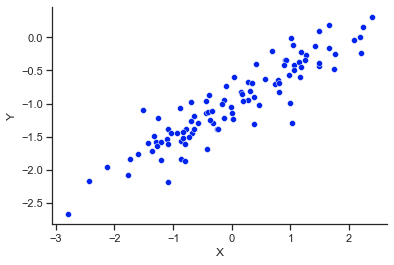

In [164]:
# Seaborn
sns.scatterplot(x='X', y='Y', data=df);

In [135]:
# Plotly Express
px.scatter(df, x='X', y='Y')

Positive linear relationship between X and Y with some variance in the data (... as expected since we created this data with some noise (error)...)

## Task e)

In [136]:
# Fit Model
lm = smf.ols(formula='Y ~ X', data=df).fit()

In [137]:
# Print summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     521.7
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           4.95e-41
Time:                        16:16:40   Log-Likelihood:               -0.20540
No. Observations:                 100   AIC:                             4.411
Df Residuals:                      98   BIC:                             9.621
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0048      0.025    -41.011      0.000      -1.053      -0.956
X              0.4959      0.022     22.841      0.000       0.453       0.539
==============================================================================
Omnibus:                        5.027   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.131
Skew:                          -0.308   Prob(JB):                       0.0769
Kurtosis:                       3.924   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
# Mean squared error of residuals
lm.mse_resid

0.05999065764513778

- The linear regression fits a model which is almost true to the values of the coefficients of the population model
(as we constructed it). 

- The predictor x is highly statistically significant and we can observe a large F-statistic
with a near-zero p-value so the null hypothesis can be rejected.

- Our model explains around 84% of the variation in the data (see Adjusted R-squared)

## Task f)

In [169]:
# create a scatterplot with OLS trendline
fig = px.scatter(df, x="X", y="Y", trendline="ols")

# make trendline red
fig.data[1].line.color = 'red'

# show figure
fig.show()

### Task g) 

In [142]:
# Fit Model
lm_2 = smf.ols(formula='Y ~ X + I(X**2)', data=df).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     258.7
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.31e-39
Time:                        16:16:41   Log-Likelihood:               -0.12169
No. Observations:                 100   AIC:                             6.243
Df Residuals:                      97   BIC:                             14.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9963      0.032    -30.745      0.000      -1.061      -0.932
X              0.4965      0.022     22.717      0.000       0.453       0.540
I(X ** 2)     -0.0067      0.017     -0.403      0.688      -0.040       0.026
==============================================================================
Omnibus:                        5.312   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                5.551
Skew:                          -0.317   Prob(JB):                       0.0623
Kurtosis:                       3.964   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Mean squared error of residuals
lm_2.mse_resid

0.060507735253767535

Arguments, that the polynomial provides a **better** fit:

- $\beta_0$ and $\beta_1$ are slightly closer to $\hat{\beta_0}$ and $\hat{\beta_1}$
   
Arguments, that the polynomial provides **not a better** fit:

- While $R^2$ is same for both models, $Adj. R^2$ (which takes model complexity into account) is slightly lower (worse)
- $\beta_0$ and $\beta_1$ have slightly higher standard error
- $\beta_2$ with $p = 0.856$ is not signifcant
- Scores for AIC and BIC are higher (worse)
- Most importantly, the p-value of the t-statistic suggests that there isn’t a significant relationship between Y
and $X^2$ why we should use the model in (e) 
    - this makes sense since we know the population model doesn't contain a quadratic relationship.

## Task h)


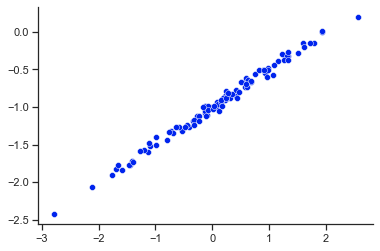

In [173]:
# a) Normal distributed values, with mean = 0 and sd = 1
X_h = np.random.normal(0, 1, 100)
# b) with lower standard deviation 
err_h = np.random.normal(0, 0.05, 100)
# c) Model
Y_h = -1 + 0.5 * X_h + err_h
# d) Scatterplot
sns.scatterplot(x=X_h, y=Y_h);

Positive linear relationship between x2 and y2 with only little variance in the data (... as expected since we created this model...).

In [174]:
# e)
df_h = pd.DataFrame({'X': X_h, 'Y': Y_h})
lm_h = smf.gls(formula='Y ~ X', data=df_h).fit()
lm_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.991
Model:                            GLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.071e+04
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          6.72e-102
Time:                        18:09:47   Log-Likelihood:                 162.53
No. Observations:                 100   AIC:                            -321.1
Df Residuals:                      98   BIC:                            -315.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9986      0.005   -206.316      0.000      -1.008      -0.989
X              0.5031      0.005    103.480      0.000       0.493       0.513
==============================================================================
Omnibus:                        0.787   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.861
Skew:                          -0.094   Prob(JB):                        0.650
Kurtosis:                       2.586   Cond. No.                         1.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# Mean squared error of residuals
lm_h.mse_resid

0.0023150688456143515

We can observe very good results ... which is not surprising since we have an almost perfect linear relationship between $Y_h$ and $X_h$.

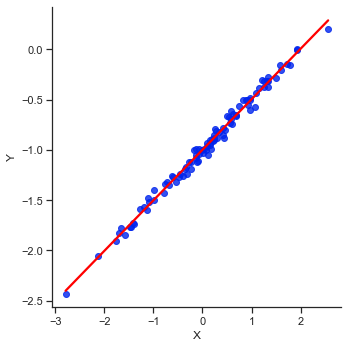

In [178]:
# f)
# Scatter Plot 
sns.lmplot(x="X", y="Y", data=df_h, ci=None, line_kws={'color': 'red'});

Almost identical... (perfect fit)

## Task i)

In [181]:
print('.'*35)
print ('95% CI noisier data (SD = 0.25):')
print(lm.conf_int())

print('.'*35)
print ('95% CI less noisy data (SD = 0.05):')
print(lm_h.conf_int())

...................................
95% CI noisier data (SD = 0.25):
                  0         1
Intercept -1.053391 -0.956152
X          0.452771  0.538933
...................................
95% CI less noisy data (SD = 0.05):
                  0         1
Intercept -1.008217 -0.989007
X          0.493478  0.512775


For the less noisy data set, the confidence intervals for both coefficients are more narrow.

## Task j)

In [149]:
# standard error (se) of paramters (b)
print('.'*35)
print ('SE for noisier data (SD = 0.25):')
display(lm.bse)
print('.'*35)
print ('SE for less noisy data (SD = 0.05):')
lm_h.bse

...................................
SE for noisier data (SD = 0.25):


Intercept    0.024500
X            0.021709
dtype: float64

...................................
SE for less noisy data (SD = 0.05):


Intercept    0.004385
X            0.004502
dtype: float64

The very small standard errors in the less noisy data set indicate that most sample means are similar to the population
mean (i.e., our sample parameters accurately reflect the population mean).